# Auto RECIST and tumour volume measurements

In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import os

#Import pipeline functions
import recist_and_volume_calculator as rc


In [2]:
#lets open a test image
path = r'../Software for qualitative assesment/test_data/interobs05_20170910_CTGTV-1vis(AB)_(DL)'
image = sitk.ReadImage(os.path.join(path,'image.nrrd'))
spacing = image.GetSpacing()
image_array = sitk.GetArrayFromImage(image)
dl_mask_array = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(path,'DL_mask.nrrd')))

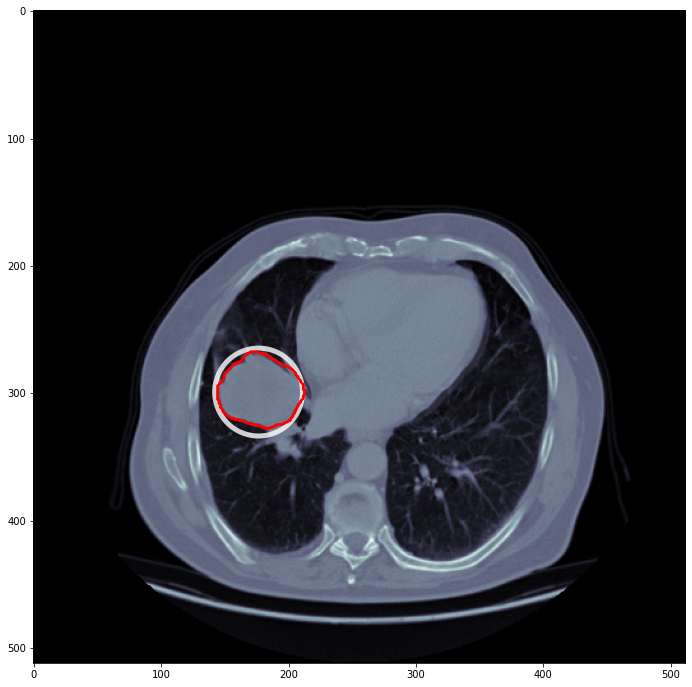

----------------------------------------
Predicted RECIST: 65 mm
Predicted tumor volume: 59.42 ml
----------------------------------------


In [3]:
##Calculate metrics
recist_predicted,volume_predicted,idx,circle = rc.calculate_values(dl_mask_array,spacing)
circle1 = plt.Circle((circle[1], circle[0]), circle[2]*2, color='white',fill=False,alpha=0.8, lw=5)

plt.figure(figsize=(12,12))
plt.imshow(image_array[idx,...],cmap='bone')
plt.contour(dl_mask_array[idx,...],colors='r')
fig = plt.gcf()
ax = fig.gca()
ax.add_patch(circle1)
plt.show()

print('-'*40)
print('Predicted RECIST: %s mm'%recist_predicted) 
print('Predicted tumor volume: %s ml'%volume_predicted)
print('-'*40)